<a href="https://colab.research.google.com/github/TheGodseeker/ML_PR/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [ ]:
!pip install datasets seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#df = load_dataset("/content/kc_house_data")
df = pd.read_csv("/content/kc_house_data.csv")
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

y = price (цена лота)

In [ ]:
#убираем ненужные столбцы (id, zipcode, т.д.)

df = df.drop(['id', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view'], axis=1)

<ipython-input-13-20d63fc6bc82>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

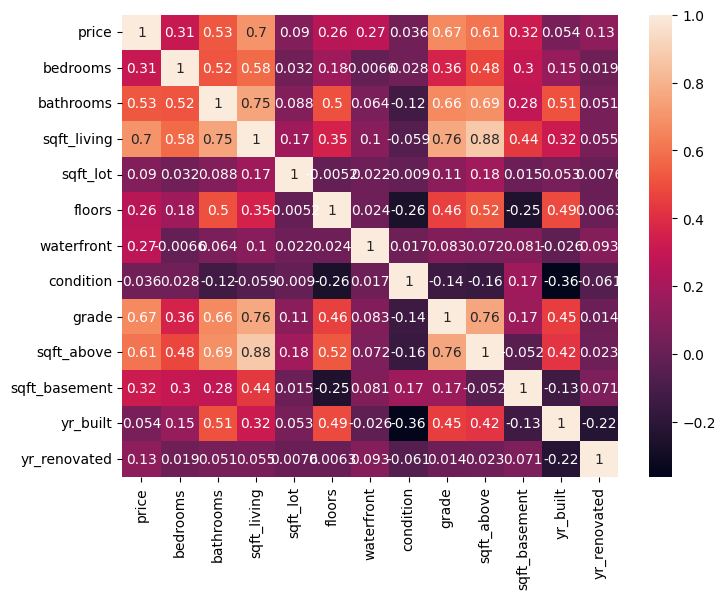

In [ ]:
#определяем корреляцию

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)

На цену участка больше всего влияет площадь зала (sqtf_living), общая оценка самого участка (grade) и площадь чердака (sqft_above *Я не знаю как иначе интерпритировать эту переменную*). Меньшее влияние оказывает состояние участка (condition), год строительства (yr_built) и площадь участка (sqft_lot).

Для последующего исследования были выбраны топ-3 переменные по наибольшему влиянию на цену, т.к. они сильнее всего могут помочь проследить/предсказать будущую цену.

In [ ]:
# чистим пропуски
df_test = df.copy()

df_test.dropna()
#пропусков в датасете нет

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0


Далее идет проверка на выбросы sqtf_living, grade и sqft_above. price проверяться не будет, т.к. вполне возможны высокие цены на недвижимость.

<Axes: ylabel='sqft_living'>

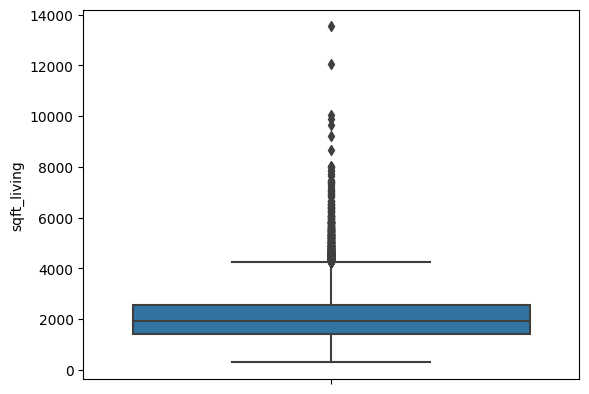

In [ ]:
#проверяем на выбросы sqtf_living

sns.boxplot(data = df, y = 'sqft_living')

<Axes: ylabel='sqft_living'>

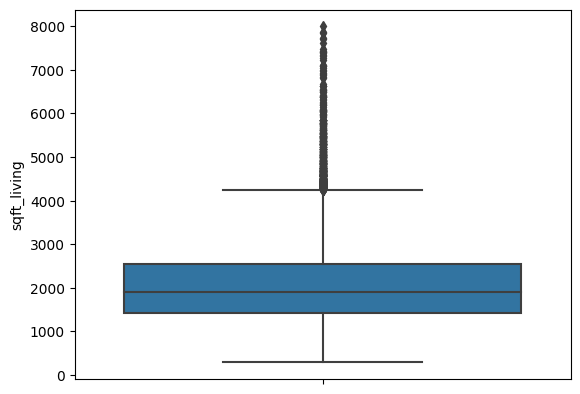

In [ ]:
#убираем все что выше 8000

for index, value in df['sqft_living'].items():
  if value > 8000: df = df.drop(index)

sns.boxplot(data = df, y = 'sqft_living')

<Axes: ylabel='grade'>

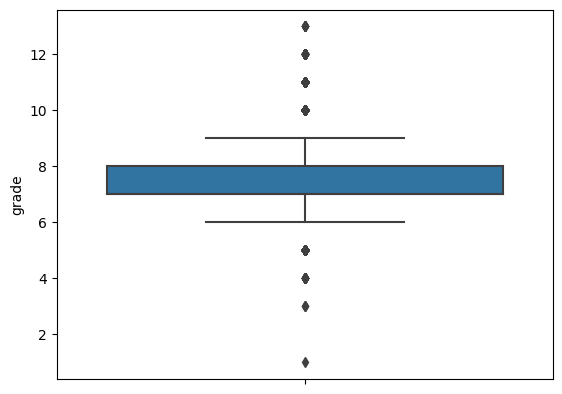

In [ ]:
#проверяем на выбросы grade

sns.boxplot(data = df, y = 'grade')

<Axes: ylabel='grade'>

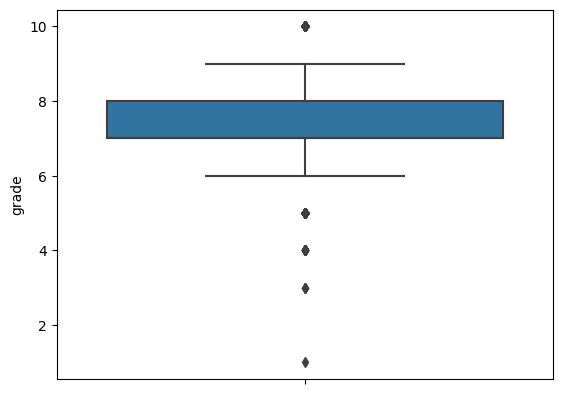

In [ ]:
#убираем все что не вписывается в 10-бальную систему

for index, value in df['grade'].items():
  if value > 10: df = df.drop(index)

sns.boxplot(data = df, y = 'grade')

<Axes: ylabel='sqft_above'>

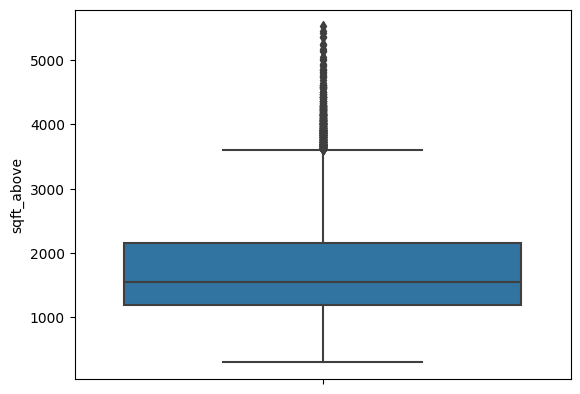

In [ ]:
#проверяем на выбросы sqft+above

sns.boxplot(data = df, y = 'sqft_above')
#все более-менее ровно, можно оставить без изменений

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [ ]:
#копируем необходимые столбцы в отдельный df
df_work = df[['price','grade', 'sqft_living', 'sqft_above']]

#трансформация

### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
"""
Код здесь
"""

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [ ]:
"""
Код здесь
"""

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""